In [5]:
import warnings
import time
import sys
import datetime
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import winsound
frequency = 400  # Hz
duration = 700    # milliseconds

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

In [2]:
df_test = pd.read_csv('../Kaggle-data/processed/test_processed_clv&churn&ltv&change_ratio_top75_scaled.csv')

In [3]:
df_test

,new_purchase_amount_sum,auth_month_diff_mean,ratio_merchant_category_nu,total_date_max,history_month_diff_mean,new_purchase_month_mean,new_month_lag_mean_x,purchase_amount_sum_mean,auth_purchase_date_max,total_predicted_purchases,total_clv,hist_date_max,new_purchase_date_max,hist_predicted_purchases,auth_purchase_date_ptp,new_predicted_purchases,auth_category_1_sum,hist_clv,new_date_max,auth_category_1_mean,purchase_change_ratio_min,new_purchase_date_ptp,history_installments_sum,new_day_max,auth_purchase_month_std,history_category_1_sum,history_transactions_count,total_month_lag_mean,days_feature2,auth_month_lag_std,new_duration_max,auth_month_lag_mean,days_feature1,authorized_flag_mean,new_recency_rfm,new_day_min,purchase_amount_std_std,month_lag_std,hist_ratio_No,auth_purchase_date_min,ratio_amount_total,new_monetary_value,history_purchase_amount_min,days_feature2_ratio,new_purchase_amount_std,days_feature1_ratio,new_category_1_mean,history_month_lag_std,new_LTV,history_purchase_month_std,purchase_amount_max_mean,history_month_lag_mean,total_amount_median,history_purchase_amount_std,month_lag_mean,hist_month_lag_mean,history_purchase_amount_sum,auth_purchase_month_mean,new_T_rfm,purchase_amount_min_std,total_weekday_mean,hist_predicted_monetary_value,total_price_mean,new_amount_month_ratio_max,hist_amount_median,auth_merchant_id_nunique,new_purchase_date_min,history_purchase_month_mean,purchase_amount_sum_std,purchase_amount_std_mean,purchase_amount_min_mean,hist_duration,purchase_amount_count_mean,new_predicted_monetary_value,new_date_min,hist_weekday_mean,auth_category_2_1.0_mean,purchase_amount_mean_std,new_duration_min,history_purchase_amount_mean,days_feature3,history_installments_std,purchase_change_ratio_var,new_purchase_month_std,new_purchase_amount_max,purchase_change_ratio_max,new_amount_max,total_weekend_mean,hist_installments_sum,total_merchant_category_mode,history_purchase_amount_max,total_price_sum,hist_recency_rfm,installments_std_std,total_predicted_monetary_value,purchase_amount_count_std,purchase_amount_mean_mean,history_category_1_mean,total_frequency_rfm,new_weekday_mean,total_duration_min,hist_weekend_mean,hist_amount_month_ratio_min,auth_category_3_2.0_mean,new_price_sum,purchase_change_ratio_mean,city_id_purchase_amount_std,total_duration,new_duration_mean,hist_duration_min,hist_date_min,hist_merchant_category_mode,purchase_amount_max_std,new_merchant_category_mode,new_city_mode,new_category_3_2.0_mean,total_monetary_value,new_clv,history_category_3_2.0_mean,hist_price_max,auth_purchase_amount_sum,city_id_purchase_amount_max,hist_price_min,installments_purchase_amount_min,hist_frequency_rfm,elapsed_time,total_recency_rfm,total_installments_sum,hist_city_mode,hist_price_mean,installments_sum_mean,history_category_2_1.0_mean,city_id_purchase_amount_min,ratio_amount_mean,category_1_purchase_amount_min,new_purchase_month_max,installments_sum_std,new_amount_total,auth_installments_sum,total_LTV,auth_category_3_3.0_mean,history_installments_mean,hist_monetary_value,new_month_lag_mean_y,auth_purchase_amount_mean,new_price_min,new_category_1_sum,new_month_diff_mean,total_city_mode,installments_std_mean,auth_purchase_amount_std,new_amount_month_ratio_mean,hist_merchant_category_nu,total_merchant_category_nu,days_feature3_ratio,auth_transactions_count,new_price_max,hist_LTV,new_purchase_month_min,new_amount_month_ratio_min,installments_mean_std,installments_min_std,new_duration,new_amount_median,auth_purchase_amount_min,total_installments_mean,category_1_purchase_amount_std,total_frequency,category_1_installments_std,auth_merchant_category_id_nunique,history_month_lag_min,hist_installments_mean,installments_max_mean,hist_amount_total,auth_subsector_id_nunique,installments_max_std,history_merchant_category_id_nunique,total_amount_month_ratio_min,new_month_lag_std,new_price_mean,installments_purchase_amount_max,city_id_purchase_amount_mean,installments_purchase_amount_std,history_merchant_id_nunique,total_month_

In [6]:
model = load_model('NN_model.keras')
print('モデルがロードされました')

モデルがロードされました


In [65]:
df_test

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0,1.073077,-1.928649,-3.203338,-2.797426,0.042173,-1.380089,-2.111083,2.652984,-2.726906,2.810210,-2.703763,-0.033556,-3.410650,-0.352016,-0.045922,-1.183223,2.132231,-2.745029,0.501809,0.542067,-0.649926,0.287211,-0.662292,-1.268569,-0.492108,1.742364,0.512800,-0.854441,0.237564,2.015611,-0.246785,0.740168,0.297815,1.255828,-2.479329,-0.790200,0.372841,0.246816,-0.258294,0.093628,0.775992,-1.845403,0.130275,0.244739,0.875296,-1.891333,-0.719146,-0.193847,-0.483480,0.106697,-0.267477,-0.373866,-1.144523,-0.135202,-1.552863,-0.100969,0.851051,0.246959,-0.045878,0.748010,-0.849765,1.049217,0.663600,-0.256871,-0.598392,1.553994,-1.016572,-0.429927,-0.579421,-0.244008,-1.116991,0.587525,-0.578866,0.343655,0.143839,-0.963439,-0.328361,-0.184395,0.738667,1.809053,1.129542,-0.104445,-0.192197,-0.972449,-0.865296,0.266298,-0.599840,0.481013,-0.236363,0.507518,-0.217564,0.145096,-0.094529,-0.453713,-1.143341,-0.072526,0.509044,-0.231756,-1.075042,-0.030463,0.142565,0.162794,-0.389044,0.014906,0.137363,0.377702,0.236560,0.161785,0.911255,-0.041805,-0.156938,0.782438,0.250520,-0.368288,0.034648,-0.336212,-0.009800,-0.177343,0.154388,0.454431,0.028420,-0.244262,0.525655,0.364567,-0.215436,-0.035200,0.314800,0.211646,-0.014314,0.210260,0.008032,-0.039458,0.288121,-0.050690,0.437405,-0.026214,0.534418,0.308882,-0.015774,-0.259588,0.213912,-0.026357,-0.038113,-0.118035,-0.109976,0.035173,-0.066335,0.173909,-0.011062,0.212136,-0.205056,0.104215,0.263825,-0.197812,0.092776,0.124393,-0.141521,0.110954,-0.176633,0.121984,0.021287,-0.292335,0.055343,-0.219431,0.137332,-0.069984,-0.065944,0.047581,0.212324,-0.424855,-0.070839,-0.106853,0.001572,-0.034848,0.310099,-0.003126,0.045564,-0.078151,-0.049355,0.014162,-0.040164,0.104040,-0.134659,0.108130,0.016415,0.097662,-0.175781,0.007592,-0.077778,-0.051786,0.043995,0.079217,-0.056394,-0.033317,-0.092082,-0.090011,-0.045891,0.125058,0.069815,-0.136726,-0.004115,-0.066373,-0.023975,-0.022378,-0.127950,-0.100635,-0.035623,0.002103,0.130183,0.011707,-0.054672,0.007228,0.028163,0.060807,-0.011607,0.036080,-0.025218,0.052292,0.043472,-0.012724,-0.000493,0.005258,0.014285,0.037226,0.121783,-0.143562,0.046580,0.001408,0.039295,-0.080374,0.087564,-0.050053,-0.031419,-0.025294,0.033694,0.033133,0.001059,0.027809,-0.020460,0.002524,-0.005186,-0.014209,0.004892,-0.065428,0.030420,0.011362,0.003982,0.034134,-0.003736,0.000478,-0.033491,-0.006358,0.008457,-0.004272,-0.000334,-0.017777
1,1,2.721850,2.090520,-4.487538,-2.984590,-0.294698,-1.326703,-2.641452,-5.814148,1.082042,-1.655637,2.765962,0.251381,-0.060920,-0.736117,0.460285,2.288392,-2.417797,-0.802857,-0.327898,-0.126210,0.678844,-0.038592,-1.607712,1.303101,3.483124,2.145550,-0.765284,-1.175588,-0.608906,-3.512283,0.607760,1.382866,0.735391,-1.203501,1.448151,0.031443,0.392400,-0.426725,1.072891,0.402589,0.885624,-1.085575,-0.602556,2.587593,0.097094,-0.757552,-0.387749,0.622599,-0.694553,-0.061915,-1.104508,-0.343884,-0.189487,-0.184653,-1.565006,1.109393,1.588057,-0.878568,-0.100041,0.252950,-1.308759,1.233555,0.260444,0.320666,1.611040,0.50267

In [7]:
# X = df_test.drop(['first_active_month', 'card_id'], axis=1)

#PCA↓
X = df_test

# # オートエンコーダーの構築
# input_dim = X.shape[1]
# encoding_dim = 128

# input_layer = Input(shape=(input_dim,))
# encoded = Dense(encoding_dim, activation='relu')(input_layer)
# decoded = Dense(input_dim, activation='sigmoid')(encoded)

# autoencoder = Model(input_layer, decoded)
# autoencoder.compile(optimizer=Adam(learning_rate = 0.00001), loss='mse')
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # オートエンコーダーの訓練
# autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

# # 特徴量の抽出
# encoder = Model(input_layer, encoded)
# X_encoded = encoder.predict(X)

# 以上追加

# ロードしたモデルで予測を行う
y_pred = model.predict(X) # X→X_encoded

# scaler_for_train = joblib.load('scaler_for_train.pkl')

# 予測結果をデータフレームに追加
# y_pred_original = scaler_for_train.inverse_transform(y_pred.reshape(-1, 1))
# df_test['target'] = y_pred_original
df_test['target'] = y_pred

3864/3864 ━━━━━━━━━━━━━━━━━━━━ 2s 578us/step


In [8]:
df_test.describe()

,new_purchase_amount_sum,auth_month_diff_mean,ratio_merchant_category_nu,total_date_max,history_month_diff_mean,new_purchase_month_mean,new_month_lag_mean_x,purchase_amount_sum_mean,auth_purchase_date_max,total_predicted_purchases,total_clv,hist_date_max,new_purchase_date_max,hist_predicted_purchases,auth_purchase_date_ptp,new_predicted_purchases,auth_category_1_sum,hist_clv,new_date_max,auth_category_1_mean,purchase_change_ratio_min,new_purchase_date_ptp,history_installments_sum,new_day_max,auth_purchase_month_std,history_category_1_sum,history_transactions_count,total_month_lag_mean,days_feature2,auth_month_lag_std,new_duration_max,auth_month_lag_mean,days_feature1,authorized_flag_mean,new_recency_rfm,new_day_min,purchase_amount_std_std,month_lag_std,hist_ratio_No,auth_purchase_date_min,ratio_amount_total,new_monetary_value,history_purchase_amount_min,days_feature2_ratio,new_purchase_amount_std,days_feature1_ratio,new_category_1_mean,history_month_lag_std,new_LTV,history_purchase_month_std,purchase_amount_max_mean,history_month_lag_mean,total_amount_median,history_purchase_amount_std,month_lag_mean,hist_month_lag_mean,history_purchase_amount_sum,auth_purchase_month_mean,new_T_rfm,purchase_amount_min_std,total_weekday_mean,hist_predicted_monetary_value,total_price_mean,new_amount_month_ratio_max,hist_amount_median,auth_merchant_id_nunique,new_purchase_date_min,history_purchase_month_mean,purchase_amount_sum_std,purchase_amount_std_mean,purchase_amount_min_mean,hist_duration,purchase_amount_count_mean,new_predicted_monetary_value,new_date_min,hist_weekday_mean,auth_category_2_1.0_mean,purchase_amount_mean_std,new_duration_min,history_purchase_amount_mean,days_feature3,history_installments_std,purchase_change_ratio_var,new_purchase_month_std,new_purchase_amount_max,purchase_change_ratio_max,new_amount_max,total_weekend_mean,hist_installments_sum,total_merchant_category_mode,history_purchase_amount_max,total_price_sum,hist_recency_rfm,installments_std_std,total_predicted_monetary_value,purchase_amount_count_std,purchase_amount_mean_mean,history_category_1_mean,total_frequency_rfm,new_weekday_mean,total_duration_min,hist_weekend_mean,hist_amount_month_ratio_min,auth_category_3_2.0_mean,new_price_sum,purchase_change_ratio_mean,city_id_purchase_amount_std,total_duration,new_duration_mean,hist_duration_min,hist_date_min,hist_merchant_category_mode,purchase_amount_max_std,new_merchant_category_mode,new_city_mode,new_category_3_2.0_mean,total_monetary_value,new_clv,history_category_3_2.0_mean,hist_price_max,auth_purchase_amount_sum,city_id_purchase_amount_max,hist_price_min,installments_purchase_amount_min,hist_frequency_rfm,elapsed_time,total_recency_rfm,total_installments_sum,hist_city_mode,hist_price_mean,installments_sum_mean,history_category_2_1.0_mean,city_id_purchase_amount_min,ratio_amount_mean,category_1_purchase_amount_min,new_purchase_month_max,installments_sum_std,new_amount_total,auth_installments_sum,total_LTV,auth_category_3_3.0_mean,history_installments_mean,hist_monetary_value,new_month_lag_mean_y,auth_purchase_amount_mean,new_price_min,new_category_1_sum,new_month_diff_mean,total_city_mode,installments_std_mean,auth_purchase_amount_std,new_amount_month_ratio_mean,hist_merchant_category_nu,total_merchant_category_nu,days_feature3_ratio,auth_transactions_count,new_price_max,hist_LTV,new_purchase_month_min,new_amount_month_ratio_min,installments_mean_std,installments_min_std,new_duration,new_amount_median,auth_purchase_amount_min,total_installments_mean,category_1_purchase_amount_std,total_frequency,category_1_installments_std,auth_merchant_category_id_nunique,history_month_lag_min,hist_installments_mean,installments_max_mean,hist_amount_total,auth_subsector_id_nunique,installments_max_std,history_merchant_category_id_nunique,total_amount_month_ratio_min,new_month_lag_std,new_price_mean,installments_purchase_amount_max,city_id_purchase_amount_mean,installments_purchase_amount_std,history_merchant_id_nunique,total_month_

(0.0, 3600.0)

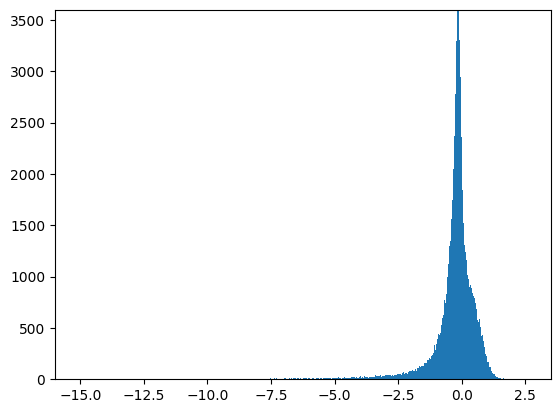

In [14]:
plt.hist(df_test['target'], bins='auto')
plt.xlim(-16, 3.5)
plt.ylim(0, 3600)

In [15]:
# PCA用
df_test_card_id = pd.read_csv('../Kaggle-data/processed/test_processed_clv&churn&ltv.csv')
df_test = pd.concat([df_test, df_test_card_id['card_id']], axis=1)

In [16]:
df_test[['card_id', 'target']].to_csv('../Kaggle-data/submission/submission_0627-10-change_ratio_top-75-NN.csv', index=False)